In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [2]:
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

print("Customers Data:")
print(customers.head())

print("\nProducts Data:")
print(products.head())

print("\nTransactions Data:")
print(transactions.head())


Customers Data:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Data:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Data:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127 

In [3]:
print("\nCustomers Info:")
print(customers.info())
print("\nMissing Values in Customers:\n", customers.isnull().sum())

print("\nProducts Info:")
print(products.info())
print("\nMissing Values in Products:\n", products.isnull().sum())

print("\nTransactions Info:")
print(transactions.info())
print("\nMissing Values in Transactions:\n", transactions.isnull().sum())



Customers Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None

Missing Values in Customers:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Products Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None

Missing Values in Products:
 ProductI

No missing values, the dataset is clean.

We have 3 tables :
1. Customers.csv
- CustomerID: Unique identifier for each customer.
- CustomerName: Name of the customer.
- Region: Continent where the customer resides.
- SignupDate: Date when the customer signed up.

2. Products.csv
- ProductID: Unique identifier for each product.
- ProductName: Name of the product.
- Category: Product category.
- Price: Product price in USD.

3. Transactions.csv
- TransactionID: Unique identifier for each transaction.
- CustomerID: ID of the customer who made the transaction.
- ProductID: ID of the product sold.
- TransactionDate: Date of the transaction.
- Quantity: Quantity of the product purchased.
- TotalValue: Total value of the transaction.
- Price: Price of the product sold.

In [9]:
# Summary Statistics
print("\nCustomers:")
print(customers.describe(include='all'))

print("\nProducts:")
print(products.describe(include=[float, int]))
print(products.describe(include=[object]))

print("\nTransactions:")
print(transactions.describe(include=[float, int]))
print(transactions.describe(include=[object]))



Customers:
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3

Products:
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000
       ProductID            ProductName Category
count        100                    100      100
unique       100                     66        4
top         P001  ActiveWear Smartwatch    Books
freq           1                      4       26

Transactions:
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000  

**Customers**
- We have 200 unique customer IDs in our csv database (as it should be- no discrepancies here)
- There are 4 unique regions that customers can be categorized into: North America, South America, Asia, Europe
- 29.5% of the customers are from South America.

**Products**
- Price Spread:
  - Mean Price: 267.55, average product falls in the mid range price category.
  - Min: 16.08, Max: 497.76
  - Interquartile Range (IQR): 75th -25th = 397.09 \- 147.77 = 249.32  (moderate spread of mid-priced products) i.e majority of products are mid-range to premium-priced, with a smaller number of very low-cost options.
  - Standard Deviation: 143.22 i.e prices are somewhat dispersed around the mean.
- 66 unique products in csv database
- 4 product categories: Books, Electronics, Clothing, Home Decor
- Duplicate product names like "ActiveWear Smartwatch" : might indicate variations of the same product i.e different models ?

**Transactions**
- 1000 transactions in the csv database
- Mean Quantity: 2.54, most customers buy around 2 and 3 units per transaction.
- Customers only buy between 1 and 4 items per transaction (is there some sort of max number of items allowed per transaction?)
- I noticed that in each transaction customer can only purchase 1 product in quantities ranging from 1-4.
- Average total transaction value: 689.99 (moderately high) i.e are customers buying cheaper items in higher quanities and more expensive items in lower quantities ?
- IQR= 1011.66 \- 295.29 = 716.37; high IQR i.e lots of variation in transaction amount.
- 1000 transactions so there are repeat orders, for example customer C0109 has the highest frequency (11 transactions)
- There are no items in database that have not been ordered ( all 100 products are present in transactions.)
- Product P059 is the most frequently purchased (19 transactions).



# Customer Analysis

<ipython-input-16-3b80aeea98a5>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_counts.index, y=region_counts.values, palette='Set2')


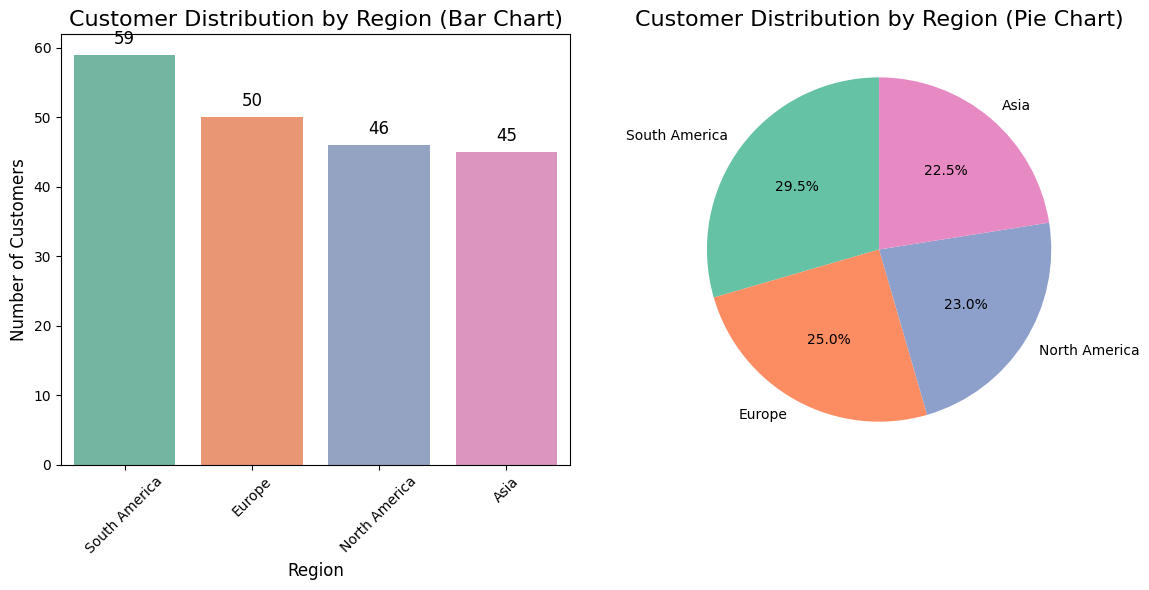

In [16]:
# Count customers by region
region_counts = customers['Region'].value_counts()

# Plot customer distribution by region (Bar Chart)
plt.figure(figsize=(12, 6))

# Bar chart
plt.subplot(1, 2, 1)
sns.barplot(x=region_counts.index, y=region_counts.values, palette='Set2')
plt.title('Customer Distribution by Region (Bar Chart)', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=45)

# Display the exact numbers on top of each bar
for i, v in enumerate(region_counts.values):
    plt.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=12)

# Pie chart
plt.subplot(1, 2, 2)
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2', len(region_counts)))
plt.title('Customer Distribution by Region (Pie Chart)', fontsize=16)

# Show both plots
plt.tight_layout()
plt.show()




The distribution of customers per region is not very irregular, but South America has the highest distribution.

In [13]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
print(customers.head())
print(transactions.head())

  CustomerID        CustomerName         Region SignupDate
0      C0001    Lawrence Carroll  South America 2022-07-10
1      C0002      Elizabeth Lutz           Asia 2022-02-13
2      C0003      Michael Rivera  South America 2024-03-07
3      C0004  Kathleen Rodriguez  South America 2022-10-09
4      C0005         Laura Weber           Asia 2022-08-15
  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  


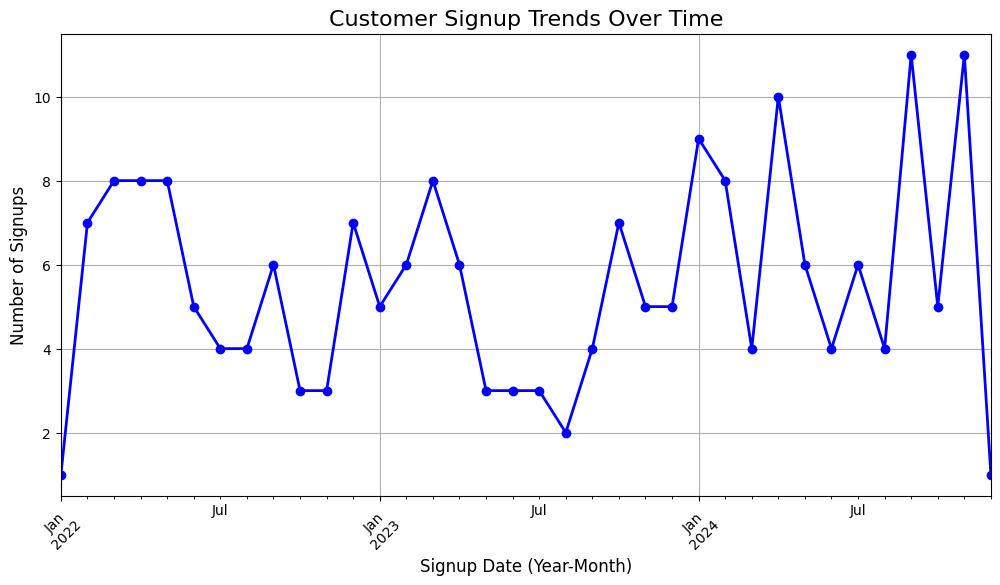

In [14]:
# Extract year and month from SignupDate
customers['SignupYearMonth'] = customers['SignupDate'].dt.to_period('M')

# Count the number of signups per month
signup_trends = customers['SignupYearMonth'].value_counts().sort_index()

# Plot signup trends over time
plt.figure(figsize=(12, 6))
signup_trends.plot(kind='line', marker='o', color='b', linewidth=2)
plt.title('Customer Signup Trends Over Time', fontsize=16)
plt.xlabel('Signup Date (Year-Month)', fontsize=12)
plt.ylabel('Number of Signups', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


The number of customer signups has grown over time but there have been significant dips every year espcially from May to August.

<Figure size 1400x800 with 0 Axes>

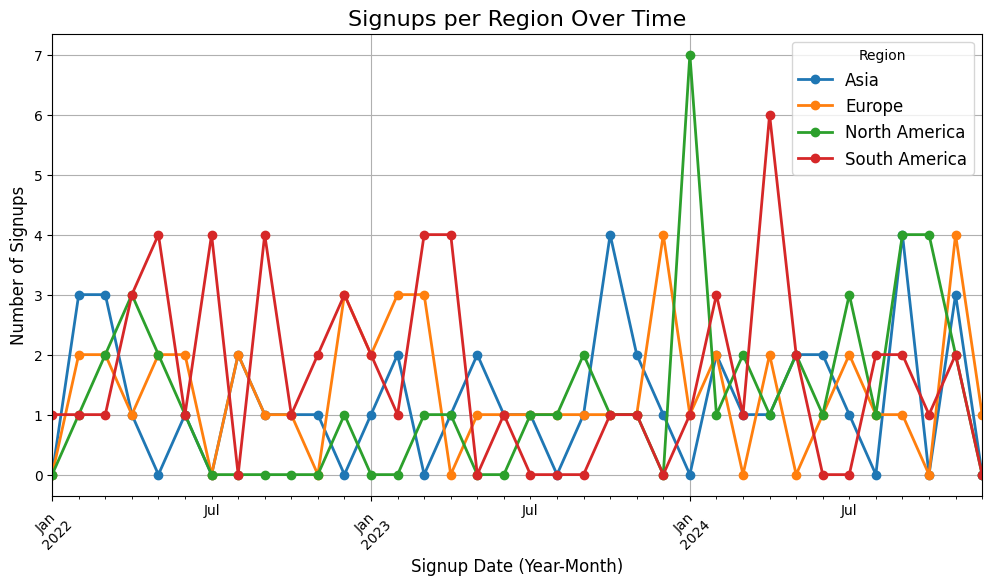

In [19]:
# Group by Region and Signup Year-Month to count signups
signup_per_region_over_time = customers.groupby(['Region', 'SignupYearMonth']).size().unstack(fill_value=0)

# Plot signup trends per region over time
plt.figure(figsize=(14, 8))
signup_per_region_over_time.T.plot(kind='line', marker='o', linewidth=2, figsize=(12, 6))
plt.title('Signups per Region Over Time', fontsize=16)
plt.xlabel('Signup Date (Year-Month)', fontsize=12)
plt.ylabel('Number of Signups', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Region', fontsize=12)
plt.grid(True)
plt.show()

- North America hit a massive spike of signups in Jan 2024
- Sign-ups in South America also had a spike in April 2024 (but not as dramatic as North America)
- Asia has very small peaks in customer sign on and it has the least customer base as well.

# Product Analysis

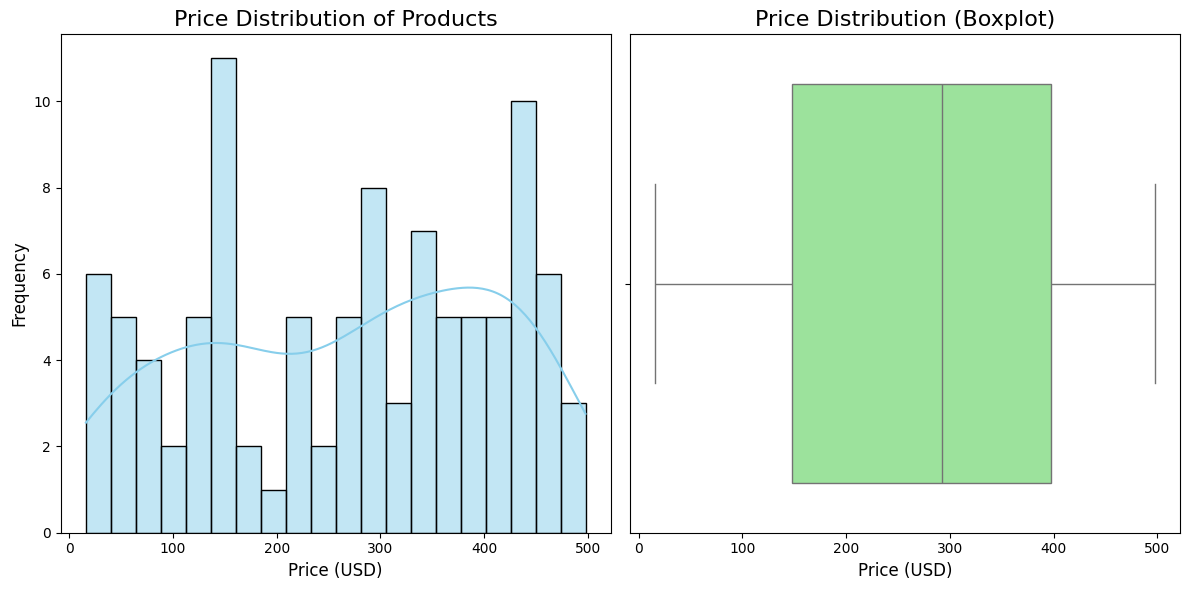

In [20]:
# Plot the distribution of product prices using a histogram
plt.figure(figsize=(12, 6))

# Histogram for price distribution
plt.subplot(1, 2, 1)
sns.histplot(products['Price'], bins=20, kde=True, color='skyblue')
plt.title('Price Distribution of Products', fontsize=16)
plt.xlabel('Price (USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Boxplot for price distribution
plt.subplot(1, 2, 2)
sns.boxplot(x=products['Price'], color='lightgreen')
plt.title('Price Distribution (Boxplot)', fontsize=16)
plt.xlabel('Price (USD)', fontsize=12)

plt.tight_layout()
plt.show()


- Highest product frequency is about 150 USD.
- We see a high concentration of products in the 280 USD - 450 USD range.
- The median price of a product is about 300 USD.
- The box plot shows us that there is a higher concentration of mid-high cost products.

<ipython-input-21-184431c6c157>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='Set1')


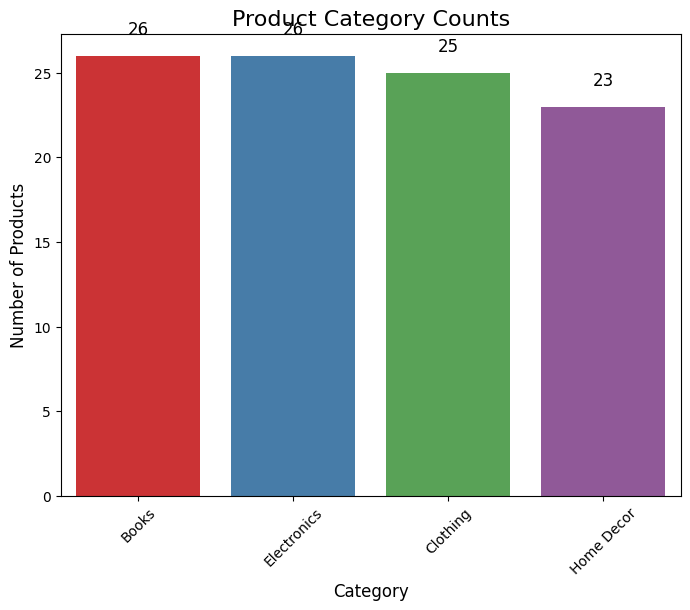

In [21]:
# Count the number of products in each category
category_counts = products['Category'].value_counts()

# Plot the category distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='Set1')
plt.title('Product Category Counts', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Number of Products', fontsize=12)
plt.xticks(rotation=45)

# Display the exact numbers on top of each bar
for i, v in enumerate(category_counts.values):
    plt.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=12)

plt.show()


- Products categories have mostly equal distributions.
- The most popular categories are books and electronics.

<ipython-input-28-97f6aaf72fb8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Category', y='Price', data=products, palette='Set2')


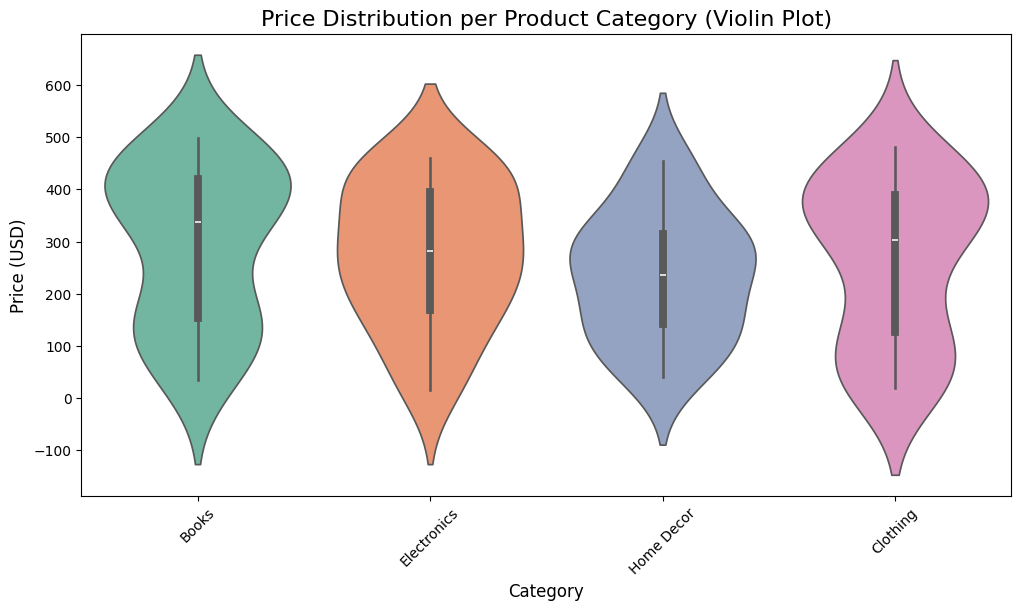

In [28]:
# Plot price distribution per category using a violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='Category', y='Price', data=products, palette='Set2')
plt.title('Price Distribution per Product Category (Violin Plot)', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.show()


- Books and clothing more left skewed distributions i.e their products are generally priced at mid to high range in their respective categories.
- Electronics and home decor are closer to "normal distribution". (But electronic items as a category are more expensive than home decor.)


In [24]:
# Calculate the mean price per category
mean_price_per_category = products.groupby('Category')['Price'].mean().sort_values(ascending=False)

# Display the mean prices
print(mean_price_per_category)

Category
Books          292.212308
Electronics    275.353462
Clothing       263.720000
Home Decor     235.020000
Name: Price, dtype: float64


As far as average price of a product in a category \- Books have the highest average price and home decor has the lowest.

In [32]:
# Count frequency of each product name
product_name_counts = products['ProductName'].value_counts()

# Display product names with multiple occurrences
multiple_models = product_name_counts[product_name_counts > 1]

print(len(multiple_models))

print("Products with multiple models or variants:")
print(multiple_models)


25
Products with multiple models or variants:
ProductName
ActiveWear Smartwatch       4
SoundWave Headphones        4
BookWorld Biography         3
TechPro T-Shirt             3
SoundWave Cookbook          3
ActiveWear Jacket           3
HomeSense T-Shirt           3
BookWorld Sweater           2
SoundWave Novel             2
ActiveWear Headphones       2
SoundWave Mystery Book      2
HomeSense Rug               2
TechPro Vase                2
SoundWave Smartwatch        2
TechPro Novel               2
BookWorld Cookbook          2
HomeSense Desk Lamp         2
ActiveWear Cookware Set     2
TechPro Textbook            2
ComfortLiving Biography     2
HomeSense Sweater           2
ActiveWear Textbook         2
ActiveWear Running Shoes    2
ActiveWear Rug              2
SoundWave Desk Lamp         2
Name: count, dtype: int64


Each product has a unique product ID but we see that 25 of of the 100 products have multiple occurences of a product name. This means that products like "ActiveWear Smartwatch" or "SoundWave Headphones" may have multiple models or variants that are not clearly mentioned to differentiate them clearly by the product name.

# Transaction Analysis

The transaction data available in the transaction csv database starts from 30th december 2023 and spans till 28th december 2024. Shows transaction data of about a year.
We notice that it gives us transaction data from after the major spikes in customer sign on.

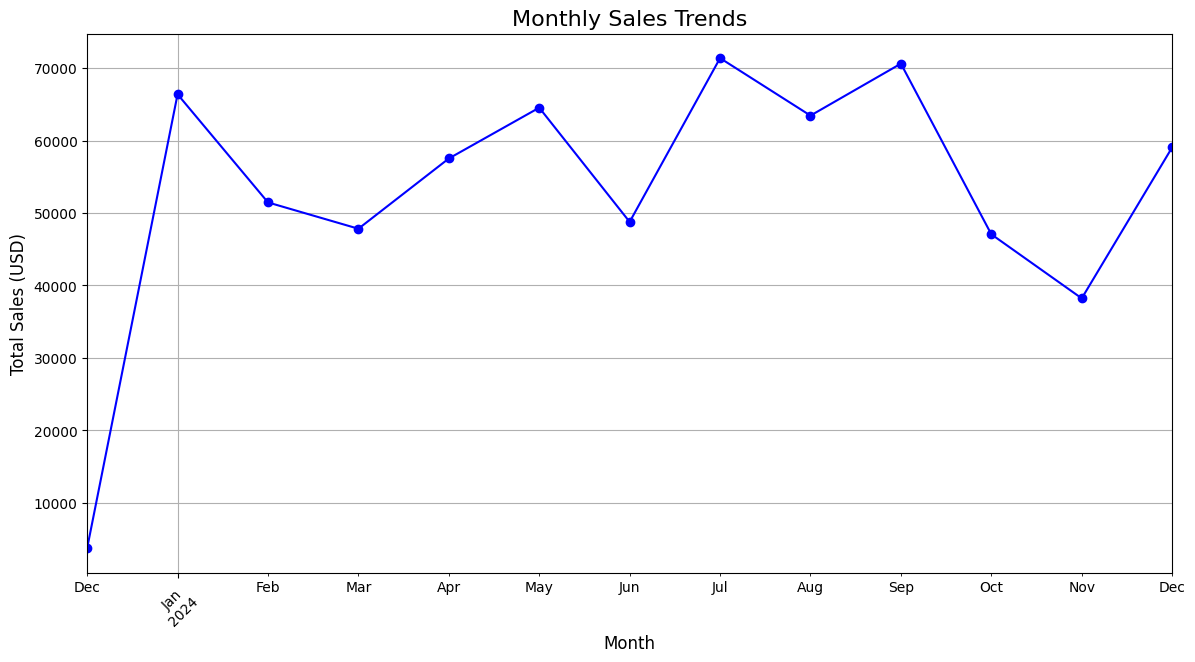

In [36]:
# Extract year and month from TransactionDate
transactions['YearMonth'] = transactions['TransactionDate'].dt.to_period('M')

# Group by YearMonth to calculate total monthly sales
monthly_sales = transactions.groupby('YearMonth')['TotalValue'].sum()

# Plot monthly sales trends
plt.figure(figsize=(14, 7))
monthly_sales.plot(kind='line', marker='o', color='blue')
plt.title('Monthly Sales Trends', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales (USD)', fontsize=12)
plt.grid()
plt.xticks(rotation=45)
plt.show()

- Sales shot up in Jan 2024 and shot up again even higher in July and September of 2024.
- Why is the holiday season (Oct-Dec) not doing as well ?


In [35]:
# Display all unique values
print("All unique dates:")
print(transactions['TransactionDate'].unique())

# Display the minimum date
print("\nEarliest date:")
print(transactions['TransactionDate'].min())

# Display the maximum date
print("\nLatest date:")
print(transactions['TransactionDate'].max())


All unique dates:
<DatetimeArray>
['2024-08-25 12:38:23', '2024-05-27 22:23:54', '2024-04-25 07:38:55',
 '2024-03-26 22:55:37', '2024-03-21 15:10:10', '2024-12-26 14:40:03',
 '2024-11-24 11:49:48', '2024-09-22 06:13:59', '2024-12-07 17:57:40',
 '2024-05-14 23:14:59',
 ...
 '2024-08-03 23:04:47', '2024-07-18 11:21:41', '2024-04-26 11:22:42',
 '2024-04-14 14:12:54', '2024-08-15 03:03:51', '2024-10-24 08:30:27',
 '2024-06-04 02:15:24', '2024-04-05 13:05:32', '2024-09-29 10:16:02',
 '2024-04-21 10:52:24']
Length: 1000, dtype: datetime64[ns]

Earliest date:
2023-12-30 15:29:12

Latest date:
2024-12-28 11:00:00


In [38]:
# Merge Transactions with Products to include ProductName
transactions_with_product_names = transactions.merge(products[['ProductID', 'ProductName']], on='ProductID', how='left')

# Display the updated Transactions table
print(transactions_with_product_names.head())


  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue   Price YearMonth                      ProductName  
0      300.68  300.68   2024-08  ComfortLiving Bluetooth Speaker  
1      300.68  300.68   2024-05  ComfortLiving Bluetooth Speaker  
2      300.68  300.68   2024-04  ComfortLiving Bluetooth Speaker  
3      601.36  300.68   2024-03  ComfortLiving Bluetooth Speaker  
4      902.04  300.68   2024-03  ComfortLiving Bluetooth Speaker  


Top 10 Most Popular Products (by Sales):
                         TotalSales  TotalQuantity
ProductName                                       
ActiveWear Smartwatch      39096.97            100
SoundWave Headphones       25211.64             97
SoundWave Novel            24507.90             58
ActiveWear Jacket          22712.56             76
ActiveWear Rug             22314.43             79
TechPro Headphones         19513.80             45
BookWorld Cookbook         19221.99             48
BookWorld Sweater          18743.79             47
TechPro Textbook           18267.96             62
ActiveWear Cookware Set    18083.73             51


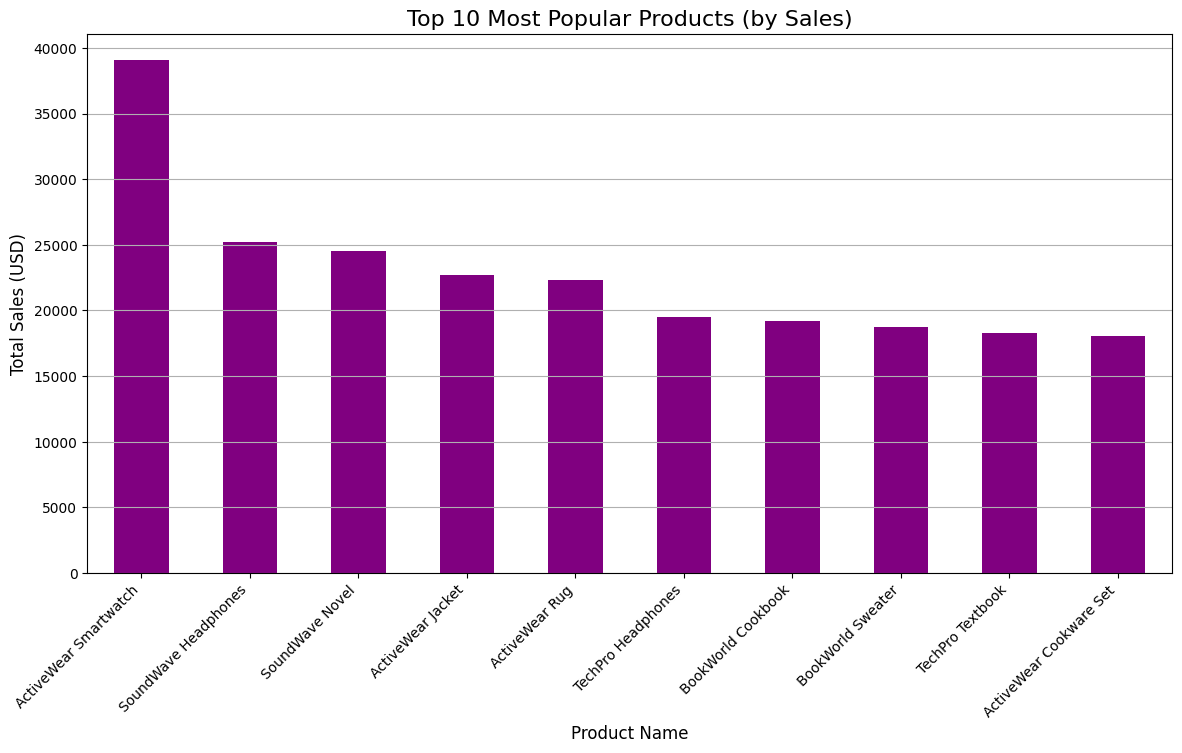

In [45]:
# Group by ProductName and calculate total sales and quantity sold
product_popularity = transactions_with_product_names.groupby('ProductName').agg(
    TotalSales=('TotalValue', 'sum'),
    TotalQuantity=('Quantity', 'sum')
).sort_values(by='TotalSales', ascending=False)

# Display the top 10 products by total sales
top_products = product_popularity.head(10)
print("Top 10 Most Popular Products (by Sales):")
print(top_products)

# Plot top 10 products by total sales
plt.figure(figsize=(14, 7))
top_products['TotalSales'].plot(kind='bar', color='purple')
plt.title('Top 10 Most Popular Products (by Sales)', fontsize=16)
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Total Sales (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()


The most popular items are shown above. We see that "ActiveWear Smartwatch" is by fair the most popular item \- it has overall sales of 39096.97 in the year of 2024 where 100 units were sold.

Top 10 Customers:
CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
C0188     7111.32
C0059     7073.28
C0028     6819.57
C0099     6715.72
C0165     6708.10
Name: TotalValue, dtype: float64


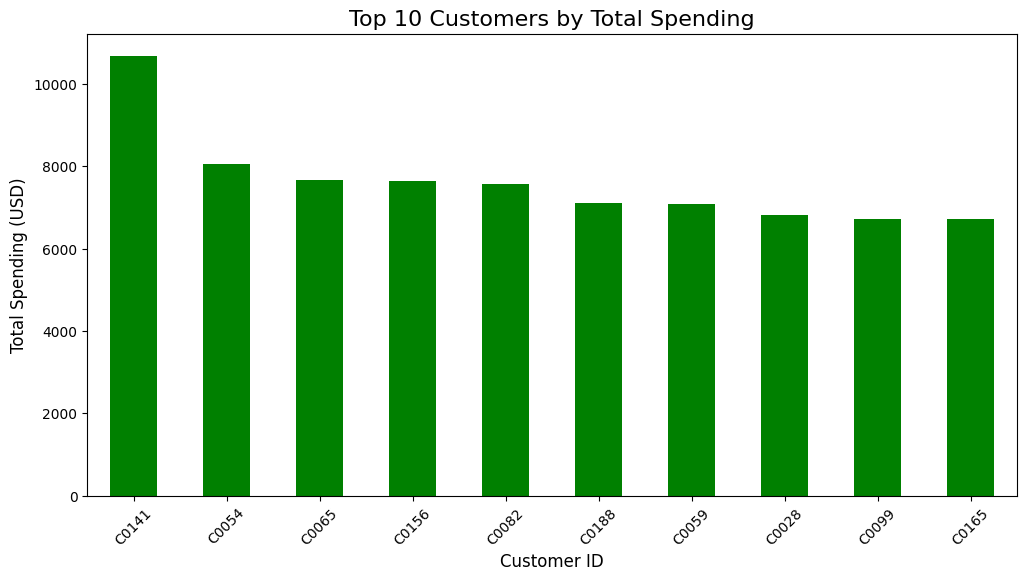

In [46]:
# Calculate total spending per customer
customer_sales = transactions.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False)

# Display top 10 customers
top_customers = customer_sales.head(10)
print("Top 10 Customers:")
print(top_customers)

# Plot top 10 customers
plt.figure(figsize=(12, 6))
top_customers.plot(kind='bar', color='green')
plt.title('Top 10 Customers by Total Spending', fontsize=16)
plt.xlabel('Customer ID', fontsize=12)
plt.ylabel('Total Spending (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.show()


Top 10 Most Popular Customers (by Sales):
                      TotalSales  TransactionCount
CustomerName                                      
Paul Parsons            10673.87                10
Bruce Rhodes             8040.39                 8
Gerald Hines             7663.70                10
William Adams            7634.45                11
Aimee Taylor             7572.91                 7
Anna Ball                7111.32                 8
Mrs. Kimberly Wright     7073.28                 8
Jennifer Pena            6819.57                 8
Rodney Eaton             6715.72                 8
Juan Mcdaniel            6708.10                 9


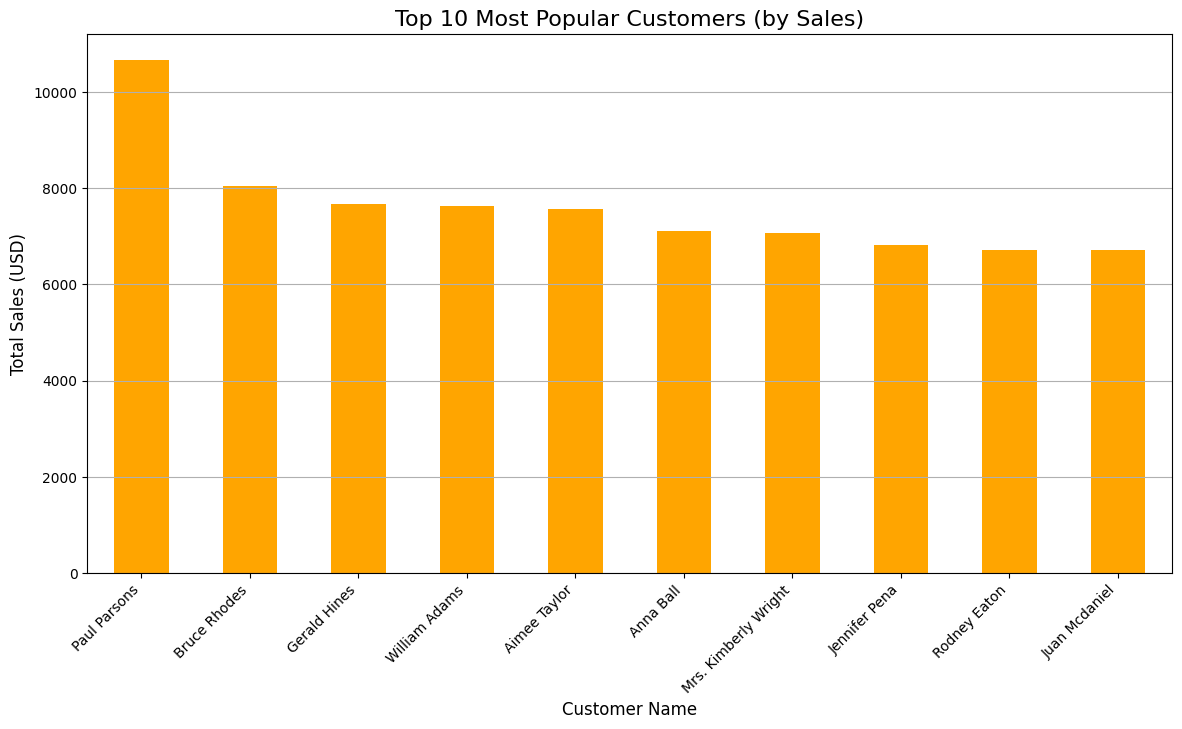

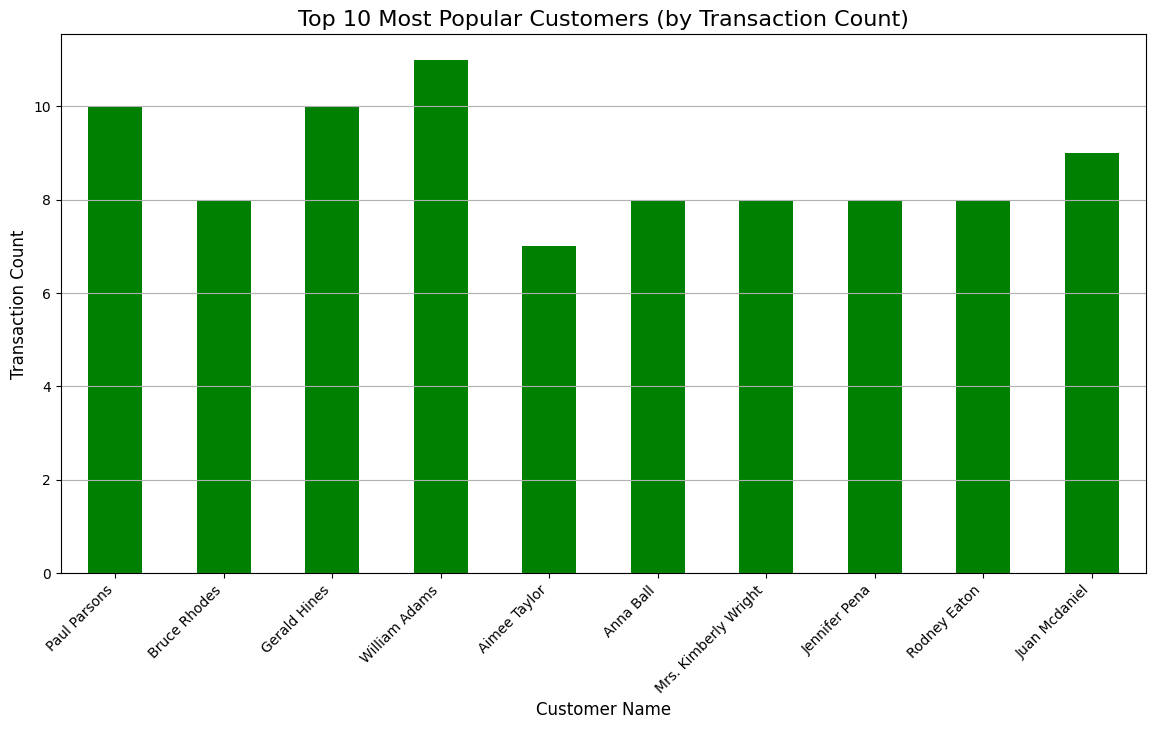

In [50]:
# Merge Transactions with Customers to include CustomerName
transactions_with_customer_names = transactions_with_product_names.merge(
    customers[['CustomerID', 'CustomerName']], on='CustomerID', how='left'
)

# Group by CustomerName and calculate total sales and transaction count
customer_popularity = transactions_with_customer_names.groupby('CustomerName').agg(
    TotalSales=('TotalValue', 'sum'),
    TransactionCount=('TransactionID', 'count')
).sort_values(by='TotalSales', ascending=False)

# Display the top 10 customers by total sales
top_customers = customer_popularity.head(10)
print("Top 10 Most Popular Customers (by Sales):")
print(top_customers)

# Plot top 10 customers by total sales
plt.figure(figsize=(14, 7))
top_customers['TotalSales'].plot(kind='bar', color='orange')
plt.title('Top 10 Most Popular Customers (by Sales)', fontsize=16)
plt.xlabel('Customer Name', fontsize=12)
plt.ylabel('Total Sales (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

# Plot top 10 customers by transaction count
plt.figure(figsize=(14, 7))
top_customers['TransactionCount'].plot(kind='bar', color='green')
plt.title('Top 10 Most Popular Customers (by Transaction Count)', fontsize=16)
plt.xlabel('Customer Name', fontsize=12)
plt.ylabel('Transaction Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()


The tables above shows the top 10 most popular customers by sales i.e max amount of money spent and top 10 most popular customers by transaction count i.e number of times they have bought from the store.
- We see that these metrics are not necessarily the same: for example Paul Parsons is the customer who spent the most amount of money but he does not have the highest number of transactions.

We see a general trend that shows that as transaction count for a customer increases, total sales or amount spent by that customer also increases. (Though this is not always the case as seen above.)

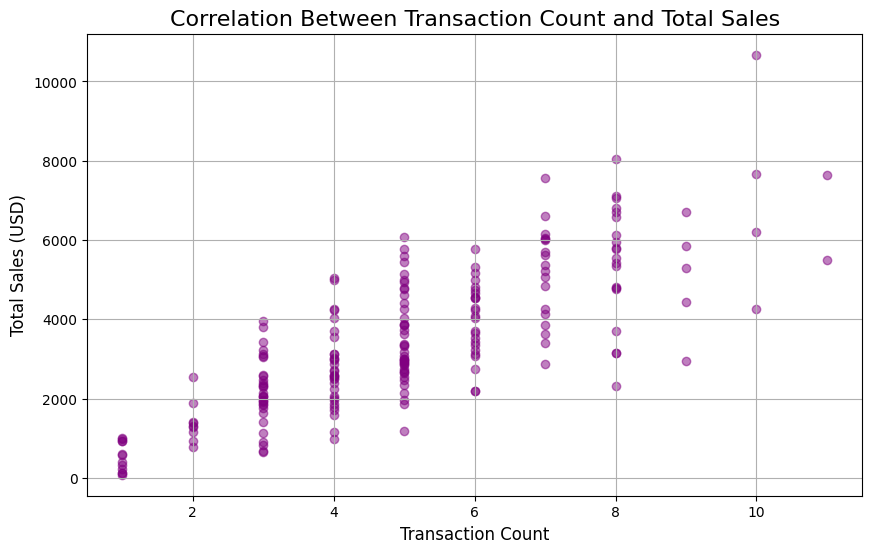

In [51]:
# Plotting the correlation between Transaction Count and Total Sales
plt.figure(figsize=(10, 6))
plt.scatter(customer_popularity['TransactionCount'], customer_popularity['TotalSales'], color='purple', alpha=0.5)
plt.title('Correlation Between Transaction Count and Total Sales', fontsize=16)
plt.xlabel('Transaction Count', fontsize=12)
plt.ylabel('Total Sales (USD)', fontsize=12)
plt.grid(True)
plt.show()


Sales by Region:
               TotalSales
Region                   
South America   219352.56
Europe          166254.63
North America   152313.40
Asia            152074.97
Transactions by Region:
               TotalTransactions
Region                          
South America                304
Europe                       234
North America                244
Asia                         218


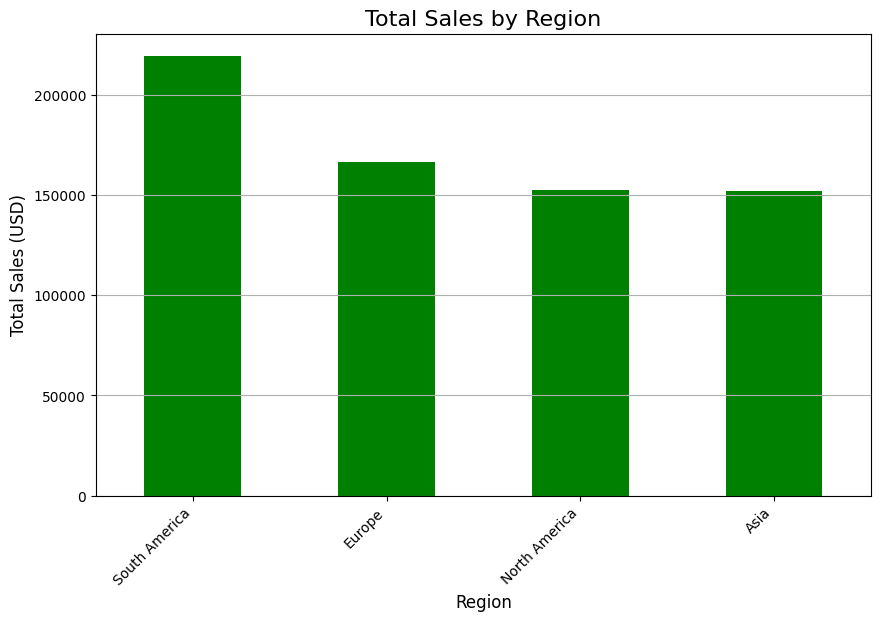

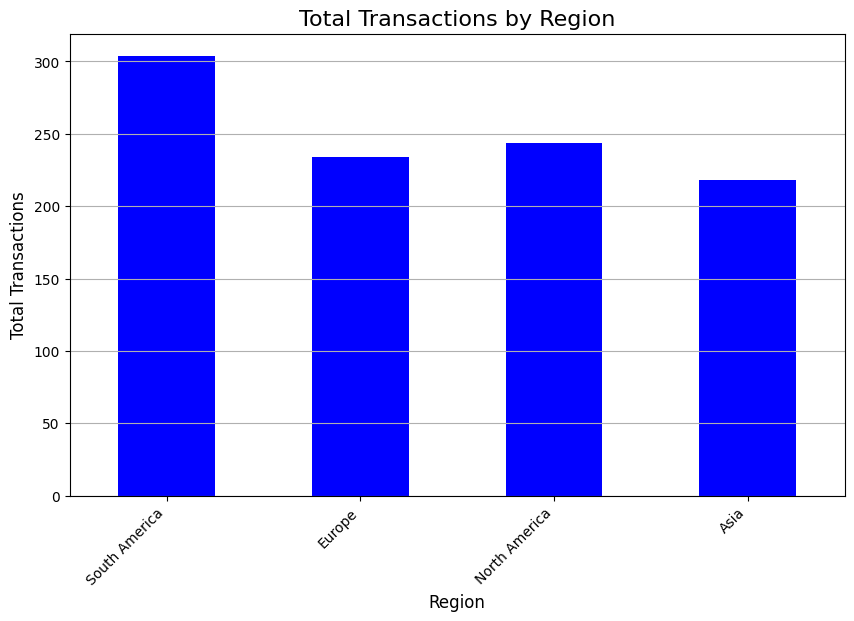

In [52]:
# Merge Transactions with Customers to include Region
transactions_with_region = transactions_with_product_names.merge(customers[['CustomerID', 'Region']], on='CustomerID', how='left')

# Calculate total sales and total transactions by region
region_sales = transactions_with_region.groupby('Region').agg(
    TotalSales=('TotalValue', 'sum'),
    TotalTransactions=('TransactionID', 'count')
).sort_values(by='TotalSales', ascending=False)

# Display the regions sorted by total sales
print("Sales by Region:")
print(region_sales[['TotalSales']])

# Display the regions sorted by total transactions
print("Transactions by Region:")
print(region_sales[['TotalTransactions']])

# Plotting total sales by region
plt.figure(figsize=(10, 6))
region_sales['TotalSales'].plot(kind='bar', color='green')
plt.title('Total Sales by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Sales (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

# Plotting total transactions by region
plt.figure(figsize=(10, 6))
region_sales['TotalTransactions'].plot(kind='bar', color='blue')
plt.title('Total Transactions by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Transactions', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()


- South America has the highest total sales with respect to the other regions and also has the most number of transactions.
- An interesting observation is that even though North America has the second most number of transactions, it has the 3rd most number of total sales therefore North America must have a lower average transaction value.
- Europe has the 2nd highest sales even given that it has lesser transactions, therefore the average transaction value in europe must be higher.

Most Sold Product Category by Region:
                  Category  TotalSales
Region                                
Asia              Clothing    49353.09
Europe               Books    47464.42
North America  Electronics    44716.43
South America        Books    69752.03


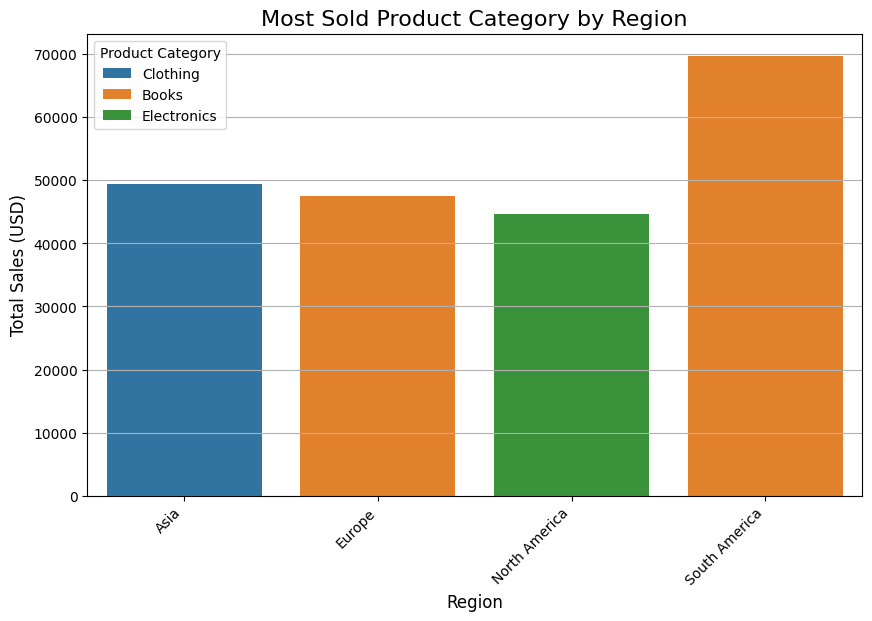

In [54]:
# Merge Transactions with Products to get Product Category
transactions_with_category = transactions_with_product_names.merge(products[['ProductID', 'Category']], on='ProductID', how='left')

# Merge the result with Customers to get Region
transactions_with_region_category = transactions_with_category.merge(customers[['CustomerID', 'Region']], on='CustomerID', how='left')

# Group by Region and Category to calculate total sales for each combination
region_category_sales = transactions_with_region_category.groupby(['Region', 'Category']).agg(
    TotalSales=('TotalValue', 'sum')
).reset_index()

# Find the most sold category in each region (sort by TotalSales)
most_sold_category_by_region = region_category_sales.sort_values(by=['Region', 'TotalSales'], ascending=[True, False])

# Display the most sold category for each region
most_sold_category_by_region_sorted = most_sold_category_by_region.groupby('Region').first()

print("Most Sold Product Category by Region:")
print(most_sold_category_by_region_sorted)

# Plotting the most sold categories by region
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='TotalSales', hue='Category', data=most_sold_category_by_region_sorted.reset_index())
plt.title('Most Sold Product Category by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Sales (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Product Category')
plt.grid(axis='y')
plt.show()


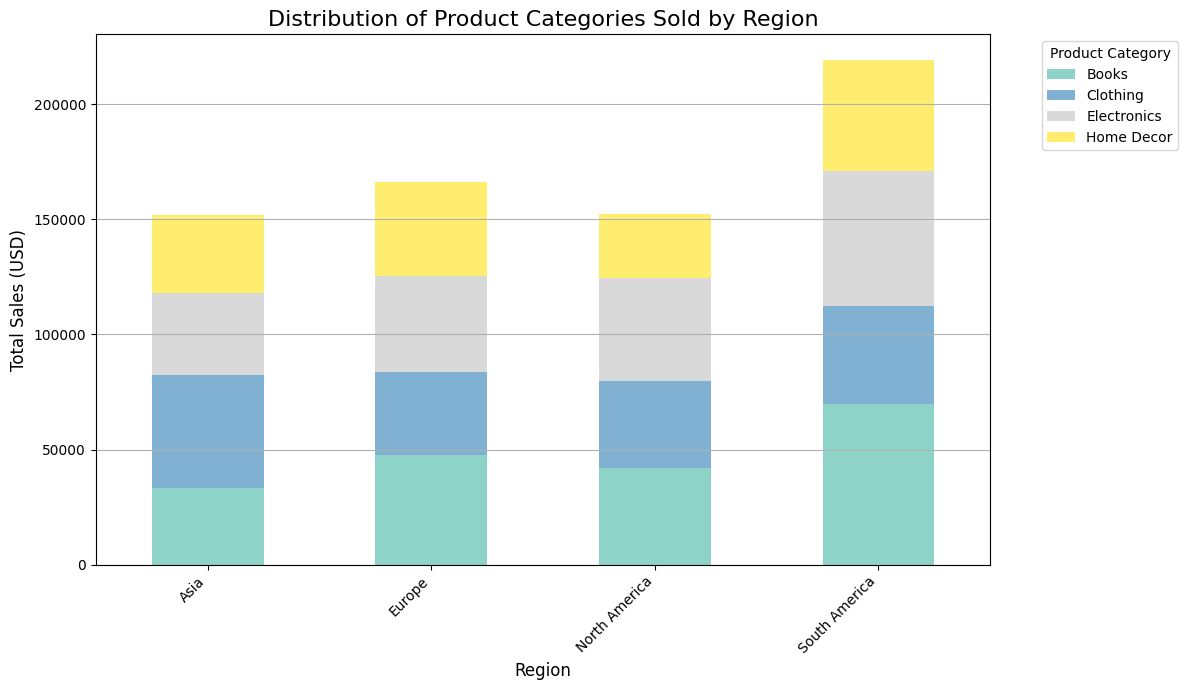

In [55]:
# Merge Transactions with Products to get Product Category
transactions_with_category = transactions_with_product_names.merge(products[['ProductID', 'Category']], on='ProductID', how='left')

# Merge the result with Customers to get Region
transactions_with_region_category = transactions_with_category.merge(customers[['CustomerID', 'Region']], on='CustomerID', how='left')

# Group by Region and Category to calculate total sales for each combination
region_category_sales = transactions_with_region_category.groupby(['Region', 'Category']).agg(
    TotalSales=('TotalValue', 'sum')
).reset_index()

# Pivot the data to get regions as rows and categories as columns
category_sales_pivot = region_category_sales.pivot_table(
    index='Region', columns='Category', values='TotalSales', aggfunc='sum', fill_value=0
)

# Plotting the distribution of each product category sold by region
category_sales_pivot.plot(kind='bar', stacked=True, figsize=(12, 7), cmap='Set3')
plt.title('Distribution of Product Categories Sold by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Sales (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


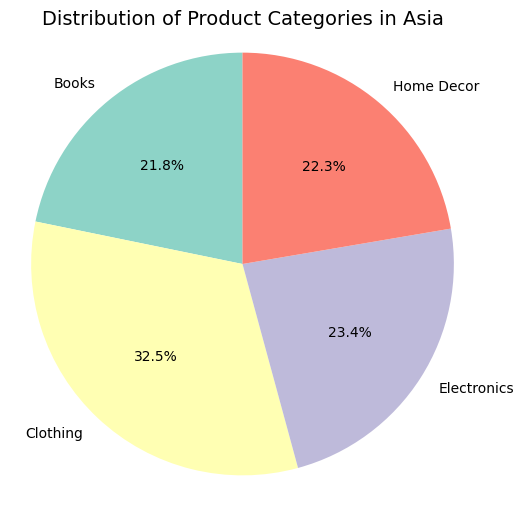

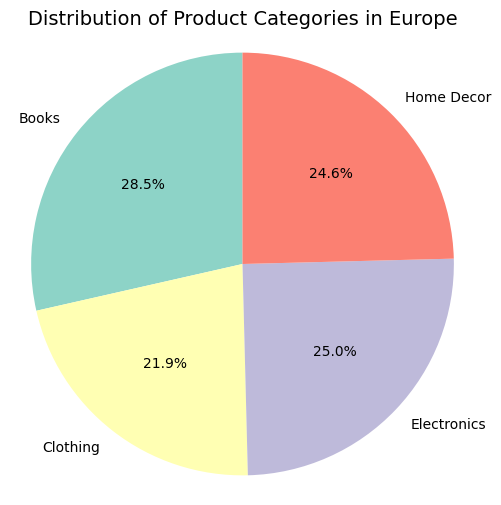

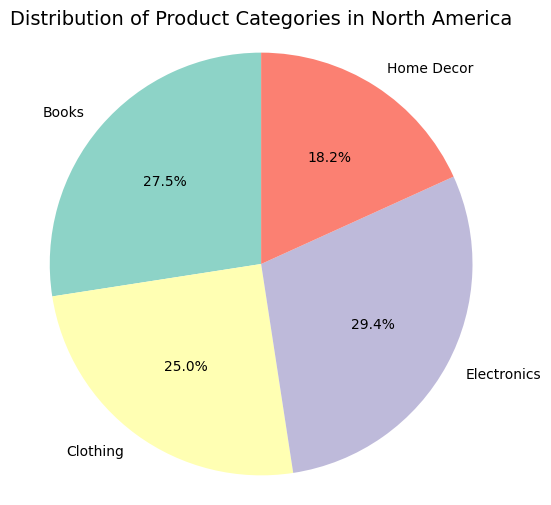

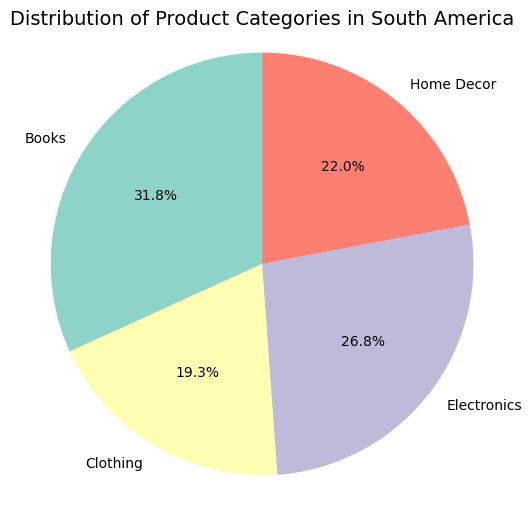

In [56]:
# Merge Transactions with Products to get Product Category
transactions_with_category = transactions_with_product_names.merge(products[['ProductID', 'Category']], on='ProductID', how='left')

# Merge the result with Customers to get Region
transactions_with_region_category = transactions_with_category.merge(customers[['CustomerID', 'Region']], on='CustomerID', how='left')

# Group by Region and Category to calculate total sales for each combination
region_category_sales = transactions_with_region_category.groupby(['Region', 'Category']).agg(
    TotalSales=('TotalValue', 'sum')
).reset_index()

# Create pie charts for each region
regions = region_category_sales['Region'].unique()
for region in regions:
    # Filter data for the current region
    region_data = region_category_sales[region_category_sales['Region'] == region]

    # Plot the pie chart for this region
    plt.figure(figsize=(6, 6))
    plt.pie(region_data['TotalSales'], labels=region_data['Category'], autopct='%1.1f%%', startangle=90, colors=plt.cm.Set3.colors)
    plt.title(f'Distribution of Product Categories in {region}', fontsize=14)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()


- Books are the most sold product category in South America and Europe.
- Electronics are the most sold in North America and clothing is the most sold in Asia.
- Sales distribution of each product category shows that Books make up the highest sales in all regions except Asia (where it is books)
- The percentage makeup of sales for each category by region might give us insights into people's spending habits in that area.
  - For example, majority of sales come from clothing in Asia whereas in South america it is the least spent on.
  - Electronics tends to be a top category that people spend on in all regions.

Product Categories Bought in Larger Quantities per Transaction:
      Category  AvgQuantityPerTransaction
1     Clothing                   2.587719
3   Home Decor                   2.576613
0        Books                   2.522222
2  Electronics                   2.468504


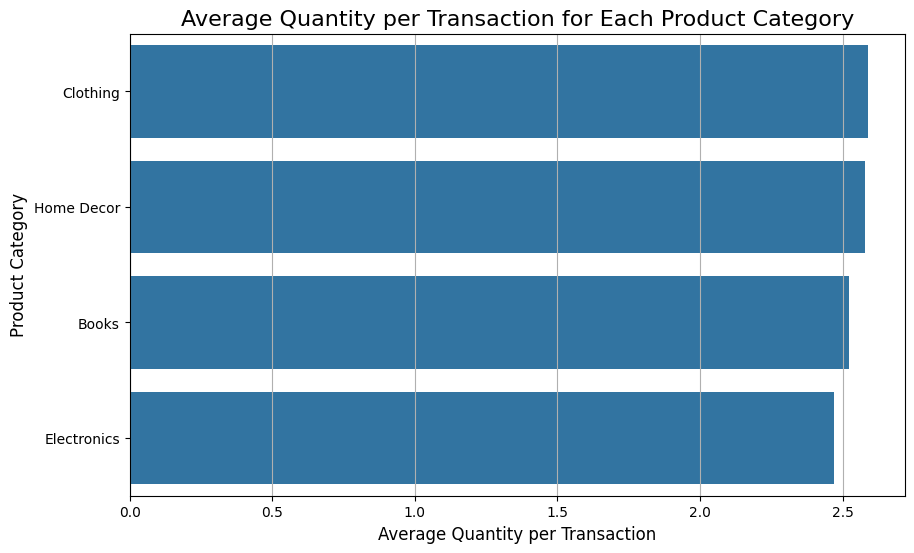

In [57]:
# Merge Transactions with Products to get Product Category
transactions_with_category = transactions_with_product_names.merge(products[['ProductID', 'Category']], on='ProductID', how='left')

# Group by Category to calculate the average quantity per transaction
category_quantity_avg = transactions_with_category.groupby('Category').agg(
    AvgQuantityPerTransaction=('Quantity', 'mean')
).reset_index()

# Sort by average quantity per transaction in descending order
category_quantity_avg_sorted = category_quantity_avg.sort_values(by='AvgQuantityPerTransaction', ascending=False)

# Display the result
print("Product Categories Bought in Larger Quantities per Transaction:")
print(category_quantity_avg_sorted)

# Plotting the average quantity per transaction for each category
plt.figure(figsize=(10, 6))
sns.barplot(x='AvgQuantityPerTransaction', y='Category', data=category_quantity_avg_sorted)
plt.title('Average Quantity per Transaction for Each Product Category', fontsize=16)
plt.xlabel('Average Quantity per Transaction', fontsize=12)
plt.ylabel('Product Category', fontsize=12)
plt.grid(axis='x')
plt.show()


We see that average quantity of item per transaction is about 2.5 across all categories. There is no change in quantity based on category. (Remains the same as what we saw in the average transaction quanity overall).

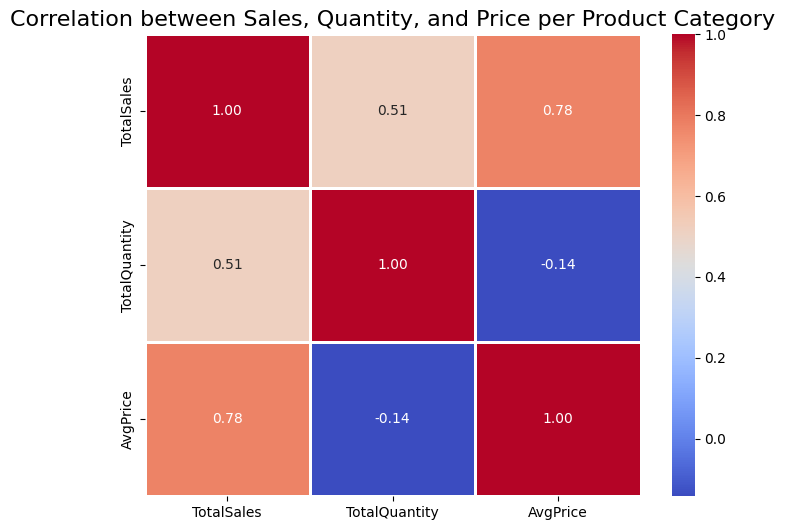

In [58]:
# Group by Category and calculate the sum of Sales, Quantity, and Price
category_sales_quantity = transactions_with_category.groupby('Category').agg(
    TotalSales=('TotalValue', 'sum'),
    TotalQuantity=('Quantity', 'sum'),
    AvgPrice=('Price', 'mean')
).reset_index()

# Calculate correlation matrix between Sales, Quantity, and Price
correlation_matrix = category_sales_quantity[['TotalSales', 'TotalQuantity', 'AvgPrice']].corr()

# Plotting heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, cbar=True)
plt.title('Correlation between Sales, Quantity, and Price per Product Category', fontsize=16)
plt.show()


Average price of an item is negatively correlated with quantity of that item purchased as expected.

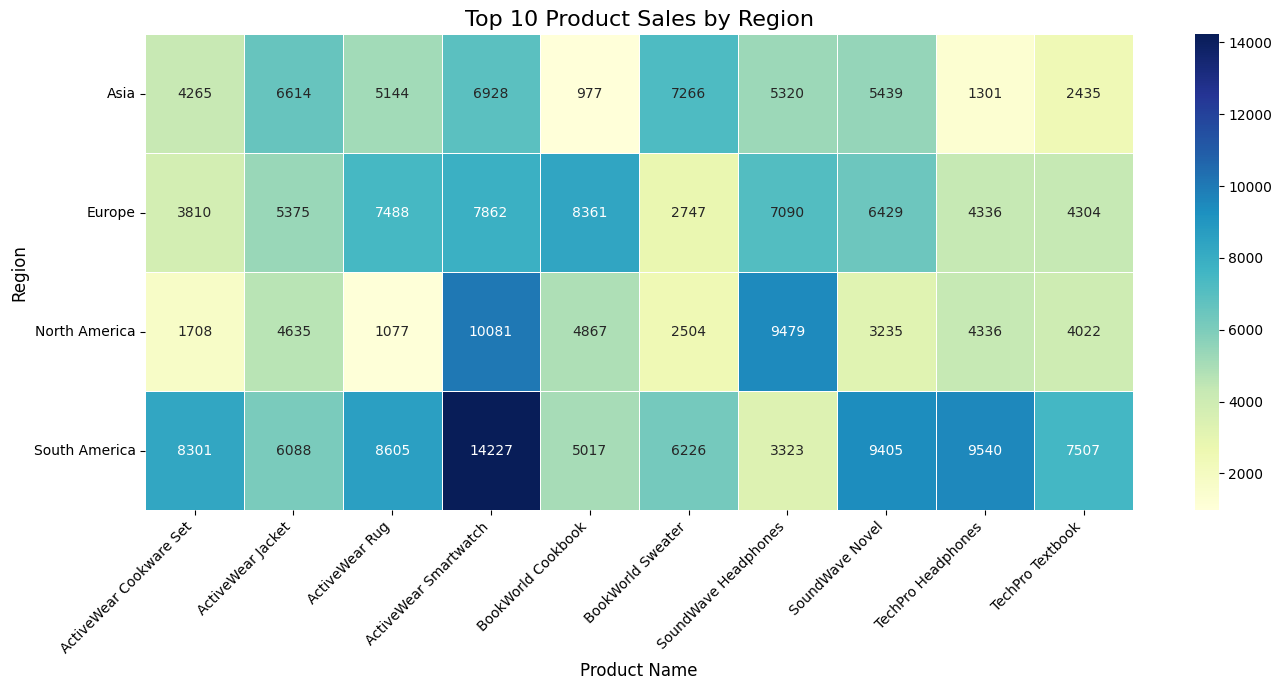

In [61]:
#Top 10 products by total sales
top_products = region_product_sales.groupby('ProductName')['TotalSales'].sum().sort_values(ascending=False).head(10).index
region_product_sales_top = region_product_sales[region_product_sales['ProductName'].isin(top_products)]

# Pivot the data to get regions as rows and product names as columns
product_sales_pivot = region_product_sales_top.pivot(index='Region', columns='ProductName', values='TotalSales')

# Plotting the heatmap with improvements
plt.figure(figsize=(14, 7))
sns.heatmap(product_sales_pivot, annot=True, cmap='YlGnBu', fmt='.0f', linewidths=0.5, cbar=True)

# Rotate product name labels and enhance the title
plt.title('Top 10 Product Sales by Region', fontsize=16)
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate product names
plt.yticks(rotation=0)  # Keep region names horizontal
plt.tight_layout()  # Adjust layout for better fit

plt.show()




Items have different levels of popularity in different regions as expected (since different product categories have more sales depending on the region).
For example:
- "ActiveWear Smartwatch" is extremely popular in South America. It is also popular in North America.
- "BookWorld Cookbook" has very low popularity in Asia.

We notice that products are generally popular in some regions over others and it is rare that we see equal or similar popularity of items in every region.

things to look into
- area freq distrubituoon of customers
- signup date visualization (when did most customers sign up i.e by month or year)
- most popular product categories, frequency dist
prices of the most popular product categories i.e avg price of each category
- Check if there are different models for each product name i.e check frequency of product names
- Which products are bought in larger quantities
- Which dates are transactions higher ?
- Popular products by year (check transactions)?
- Popular products by area ?
- Which customers order the most ?
- Which are the most popular products ?